# Homework 3

## Problem 1

In [1]:
# Loading packages
import numpy as np

### Part (a)

In [2]:
# a, b, c = [float(i) for i in input().split()]
# a, b, c = 0.001, 1000, 0.001
a, b, c = 1.e-3, 1.e+3, 1.e-3

def P(x):
    return a*x**2 + b*x + c

# discriminant
disc = b**2 - 4*a*c

# roots
x1, x2 = (-b + np.sqrt(disc))/(2*a), (-b - np.sqrt(disc))/(2*a)

print("""x1 = {0} and f(x1) = {1}
x2 = {2} and f(x2) = {3}""".format(x1, P(x1), x2, P(x2)))

x1 = -9.999894245993346e-07 and f(x1) = 1.0575401665491313e-08
x2 = -999999.999999 and f(x2) = 7.247924804689582e-08


### Part (b)

In [3]:
# roots
xb1, xb2 = (2*c)/(-b - np.sqrt(disc)), (2*c)/(-b + np.sqrt(disc))

print("""x1 = {0} and f(x1) = {1}
x2 = {2} and f(x2) = {3}""".format(xb1, P(xb1), xb2, P(xb2)))

x1 = -1.000000000001e-06 and f(x1) = 0.0
x2 = -1000010.5755125057 and f(x2) = 10575.62534720993


### Part (c)

In [4]:
print("""disc = {0}
sqrt(disc) = {1}
-b + sqrt(disc) = {2}
-b - sqrt(disc) = {3}
""".format(disc, np.sqrt(disc), -b + np.sqrt(disc), -b - np.sqrt(disc)))

disc = 999999.999996
sqrt(disc) = 999.999999998
-b + sqrt(disc) = -1.999978849198669e-09
-b - sqrt(disc) = -1999.999999998



In [5]:
print("""Correct roots:
x1 = {0} and f(x1) = {1}
x2 = {2} and f(x2) = {3}""".format(xb1, P(xb1), x2, P(x2)))

Correct roots:
x1 = -1.000000000001e-06 and f(x1) = 0.0
x2 = -999999.999999 and f(x2) = 7.247924804689582e-08


Another solution

In [6]:
# with numpy

# roots
R = np.roots([a, b, c])

print("""x1 = {0} and f(x1) = {1}
x2 = {2} and f(x2) = {3}""".format(R[1], P(R[1]), R[0], P(R[0])))

x1 = -1.000000000001e-06 and f(x1) = 0.0
x2 = -999999.999999 and f(x2) = 7.247924804689582e-08


# Problem 2

In [7]:
# reset variables
%reset -f 

# Loading packages
import numpy as np

### Part (a)

In [8]:
# function and derivative
f = lambda x : x*(x - 1)
adf = lambda x : 2*x - 1

# variables
x0, delta = 1, 1.e-2

#numerical derivative
df = (f(x0 + delta) - f(x0))/delta

print("""Df/dx: {0}\n f'(x) = {1}\n error = {2}""".format(df, adf(x0), df - adf(x0)))

Df/dx: 1.010000000000001
 f'(x) = 1
 error = 0.010000000000000897


### Part (b)

In [9]:
def dv(x0, delta):
    return (f(x0 + delta) - f(x0))/delta

for delta in  [10**(-d) for d in range(4, 16, 2)]:
    print("""delta: {0}\n Df = {1}\n f'(x) = {2}\n error = {3}""".format(delta, f(x0 + delta) - f(x0), dv(x0, delta), dv(x0, delta) - adf(x0)))

delta: 0.0001
 Df = 0.00010000999999998898
 f'(x) = 1.0000999999998899
 error = 9.999999988985486e-05
delta: 1e-06
 Df = 1.0000009999177332e-06
 f'(x) = 1.0000009999177333
 error = 9.99917733279787e-07
delta: 1e-08
 Df = 1.0000000039225289e-08
 f'(x) = 1.0000000039225287
 error = 3.922528746258536e-09
delta: 1e-10
 Df = 1.000000082840371e-10
 f'(x) = 1.000000082840371
 error = 8.284037100736441e-08
delta: 1e-12
 Df = 1.0000889005833413e-12
 f'(x) = 1.0000889005833413
 error = 8.890058334132256e-05
delta: 1e-14
 Df = 9.992007221626508e-15
 f'(x) = 0.9992007221626509
 error = -0.0007992778373491216


Python can't handle the $Df$ with $\delta = 10^{-10}$.

## Problem 3

In [10]:
# reset variables
%reset -f 

# Loading packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style("darkgrid")

import numpy as np
import scipy.integrate as int

### Part (a)

In [11]:
# constants
V = 1000.0 * 1.e-6 # volume in cubic meters
rho = 6.022 * 1.e+28 # number density of atoms in (cubic meters)^-1
theta_D = 438.0 # Debye temperature in Kelvin
k_B = 1.380649 * 1.e-23 # Boltzmann constant


# integrand
def f(x):
    return (x**4 * np.exp(x))/(np.exp(x) - 1)**2

def cv(T):
    a, b = 0.0, theta_D/T
    N = 1000
    h = (b - a)/N
    
    x = np.arange(a+h, b+h, h)
    y = np.insert(f(x), 0, 0.0)
    x = np.insert(x, 0, 0.0)
    
    I = int.trapezoid(y, x)
    
    return 9*V*rho*k_B*(T/theta_D)**3*I

In [12]:
cv(20)

18.505506959566482

### Part (b)

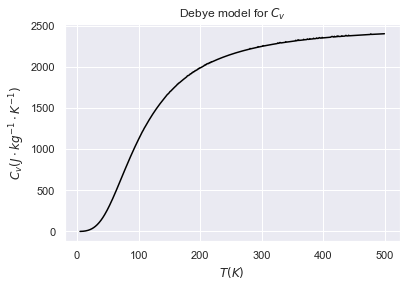

In [13]:
# Domain
st = 1
T = np.arange(5, 500, st)

# Function
C = []
for t in T:
    C.append(cv(t))

# Plot
plt.plot(T, C, color='black')

# Aesthetics
plt.title('Debye model for $C_v$')
plt.xlabel('$T (K)$')
plt.ylabel('$C_v (J\cdot kg^{-1}\cdot K^{-1})$')
# plt.gca().set_aspect('equal', adjustable='box') 

plt.savefig("plot.pdf")
plt.show()